In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston,load_diabetes
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time
from IPython import display
%matplotlib inline

In [98]:
pre_data = load_boston()
print(type(pre_data))

<class 'sklearn.utils.Bunch'>


In [163]:
headings = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B 1000","LSTAT"]
data = pd.DataFrame(pre_data["data"],columns = headings)
data_norm = (data - data.mean())/data.std()
index = np.linspace(1,506,506).astype(int)
data_norm.insert(0,"id",index,True)
data_norm.head()
#data.head()

,id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000,LSTAT
0,1,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,2,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,3,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,4,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,5,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [164]:
target = pd.DataFrame(pre_data["target"],columns = ["MEDV"])
target_norm = (target-target.mean())/target.std()
target_norm.insert(0,"id",index,True)
target_norm.head()

,id,MEDV
0,1,0.159528
1,2,-0.101424
2,3,1.322937
3,4,1.181589
4,5,1.486032


<ul>
<li><p>CRIM     per capita crime rate by town</p></li>
<li><p>ZN       proportion of residential land zoned for lots over 25,000 sq.ft.</p></li>
<li><p>INDUS    proportion of non-retail business acres per town</p></li>
<li><p>CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</p></li>
<li><p>NOX      nitric oxides concentration (parts per 10 million)</p></li>
<li><p>RM       average number of rooms per dwelling</p></li>
<li><p>AGE      proportion of owner-occupied units built prior to 1940</p></li>
<li><p>DIS      weighted distances to five Boston employment centres</p></li>
<li><p>RAD      index of accessibility to radial highways</p></li>
<li><p>TAX      full-value property-tax rate per \$10,000</p></li>
<li><p>PTRATIO  pupil-teacher ratio by town</p></li>
<li><p>B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</p></li>
<li><p>LSTAT    % lower status of the population</p></li>
<li><p>MEDV     Median value of owner-occupied homes in $1000’s</p></li>
</ul>

In [168]:
X_train,X_test,Y_train,Y_test = train_test_split(data_norm,target_norm,test_size = 0.2)

In [169]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(404, 14) (404, 2)
(102, 14) (102, 2)


In [171]:
mod_data = X_train.iloc[:,1:]
mod_target = Y_train.iloc[:,1:]
model = LinearRegression(fit_intercept = False,normalize = False,copy_X = True).fit(mod_data,mod_target)
print("Mean squared error on train: ",mean_squared_error(model.predict(mod_data),mod_target))
print("Mean squared error on test: ",mean_squared_error(model.predict(X_test.iloc[:,1:]),Y_test.iloc[:,1:]))

Mean squared error on train:  0.2179577817660706
Mean squared error on test:  0.4412300820043989


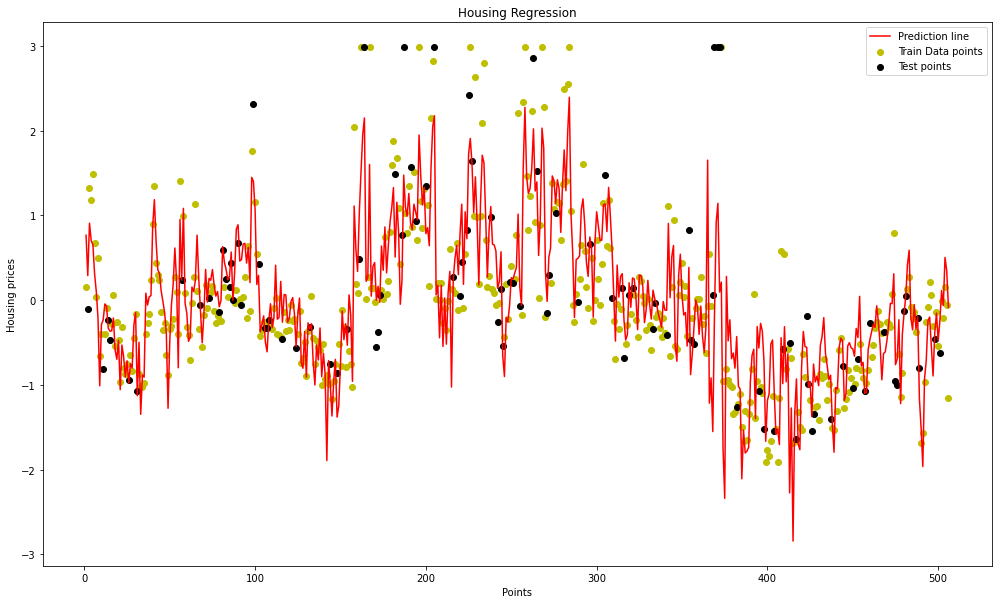

In [176]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(111)

ax.plot(np.linspace(1,506,506),np.dot(data_norm.iloc[:,1:],model.coef_.T),c = "r",label = "Prediction line")
ax.scatter(X_train["id"],mod_target,c = "y",label = "Train Data points")
ax.scatter(X_test["id"],Y_test.iloc[:,1:],c = "k",label = "Test points")
ax.legend()
#ax.set_xlim(-100,700)
#ax.set_ylim(-30,70)
ax.set_ylabel("Housing prices")
ax.set_xlabel("Points")
plt.title("Housing Regression")
plt.show()

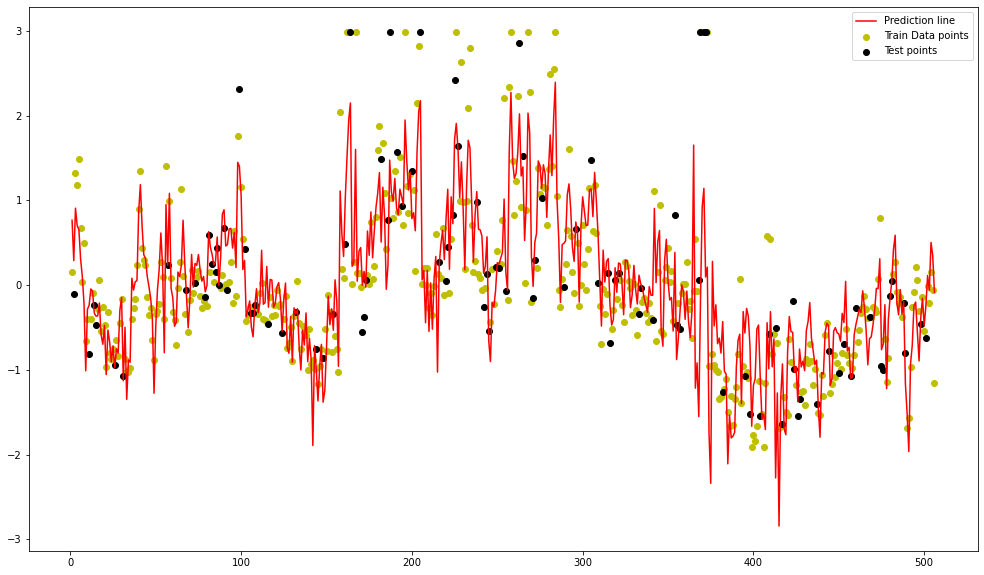

In [230]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(111)
ax.set_ylabel("Housing prices")
ax.set_xlabel("Points")
plt.title("Housing Regression")
test = list()
train = list()
for feat in range(2,15):
    try:
        model = LinearRegression(fit_intercept = False,normalize = False,copy_X = True).fit(X_train.iloc[:,1:feat],Y_train.iloc[:,1:])
        train.append(mean_squared_error(model.predict(X_train.iloc[:,1:feat]),Y_train.iloc[:,1:]))
        test.append(mean_squared_error(model.predict(X_test.iloc[:,1:feat]),Y_test.iloc[:,1:]))
        plt.cla()
        ax.scatter(X_train["id"],Y_train.iloc[:,1:],c = "y",label = "Train Data points")
        ax.scatter(X_test["id"],Y_test.iloc[:,1:],c = "k",label = "Test points")
        ax.plot(np.linspace(1,506,506),np.dot(data_norm.iloc[:,1:feat],model.coef_.T),c = "r",label = "Prediction line")
        ax.legend()
        #plt.show()
        display.display(plt.gcf())
        display.clear_output(wait=True)
        #display.display(plt.gcf())  
        time.sleep(1.0)
    except KeyboardInterrupt:
        break
    

,Train MSE,Test MSE
0,0.783707,1.103341
1,0.686548,1.077233
2,0.626493,1.017298
3,0.600253,0.948292
4,0.598132,0.947662
5,0.346299,0.671946
6,0.341615,0.682407
7,0.310845,0.602873
8,0.307620,0.616613
9,0.298770,0.615169


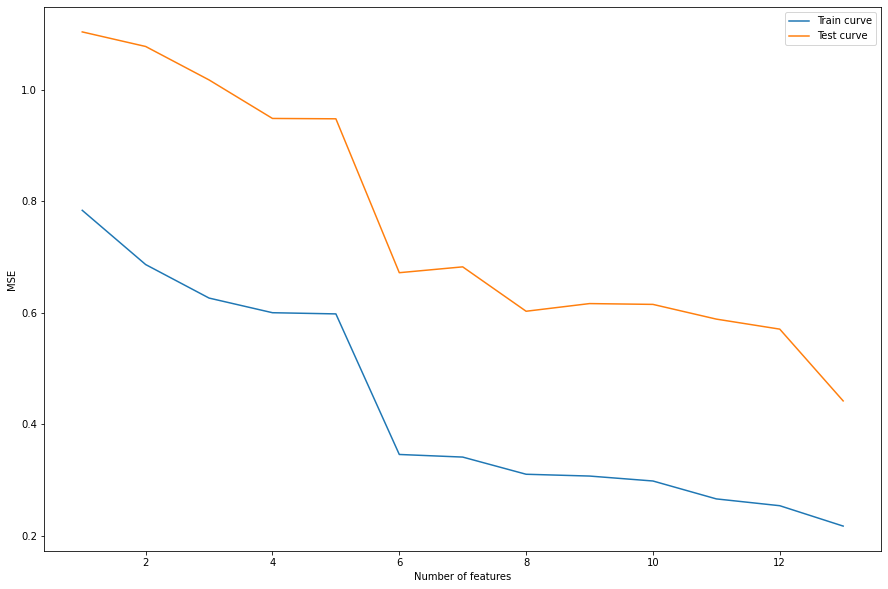

In [234]:
plt.figure(figsize = (15,10))
sns.lineplot(np.linspace(1,len(train),len(train)),train,label = "Train curve")
sns.lineplot(np.linspace(1,len(train),len(train)),test,label = "Test curve")
plt.xlabel("Number of features")
plt.ylabel("MSE")
pd.DataFrame([i for i in zip(train,test)],columns = ["Train MSE","Test MSE"])

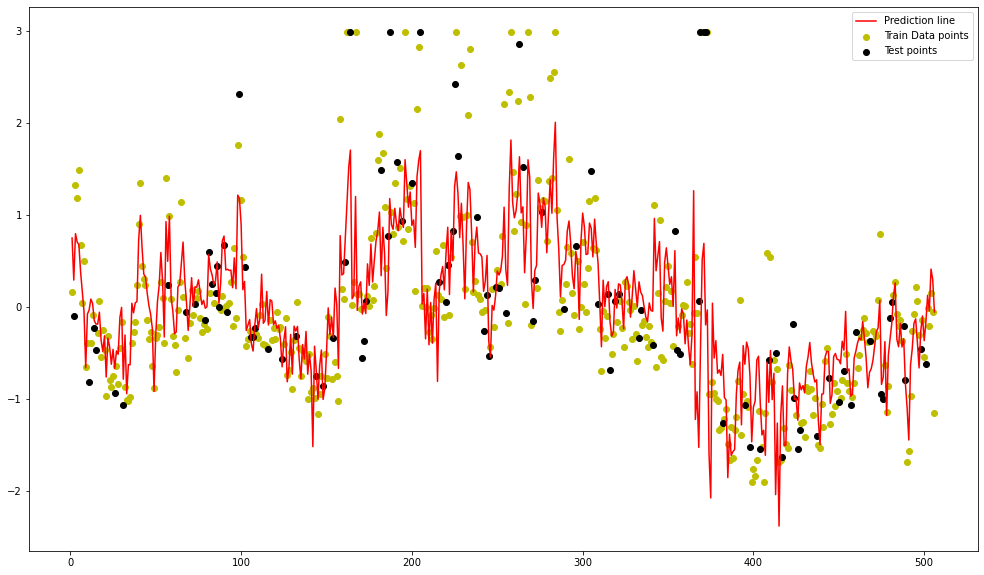

In [274]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(111)
ax.set_ylabel("Housing prices")
ax.set_xlabel("Points")
plt.title("Housing Regression")
test = list()
train = list()
for feat in range(2,15):
    temp1 = list()
    temp2 = list()
    for alp in [5,1.66666667,50,16.66666667,500,166.66666667]:
        try:
            model = Ridge(alpha = alp,fit_intercept = False,normalize = False,copy_X = True).fit(X_train.iloc[:,1:feat],Y_train.iloc[:,1:])
            temp1.append(mean_squared_error(model.predict(X_train.iloc[:,1:feat]),Y_train.iloc[:,1:]))
            temp2.append(mean_squared_error(model.predict(X_test.iloc[:,1:feat]),Y_test.iloc[:,1:]))
            plt.cla()
            ax.scatter(X_train["id"],Y_train.iloc[:,1:],c = "y",label = "Train Data points")
            ax.scatter(X_test["id"],Y_test.iloc[:,1:],c = "k",label = "Test points")
            ax.plot(np.linspace(1,506,506),np.dot(data_norm.iloc[:,1:feat],model.coef_.T),c = "r",label = "Prediction line")
            ax.legend()
            #plt.show()
            display.display(plt.gcf())
            display.clear_output(wait=True)
            #display.display(plt.gcf())  
            time.sleep(0.01)
        except KeyboardInterrupt:
            break
    train.append(temp1)
    test.append(temp2)
    

In [278]:
mylist = list()
for i in range(len(train)):
    temp = list()
    for j in range(6):
        temp.append(train[i][j])
        temp.append(test[i][j])
    mylist.append(temp)
res = pd.DataFrame(mylist)   
res
               
    

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.783724,1.104066,0.783708,1.103462,0.785137,1.111822,0.783888,1.106146,0.824796,1.159561,0.794309,1.128742
1,0.686570,1.077152,0.686550,1.077218,0.688474,1.077557,0.686789,1.077037,0.746639,1.113526,0.701280,1.084860
2,0.626508,1.017242,0.626494,1.017288,0.627827,1.017452,0.626657,1.017155,0.677543,1.048843,0.637353,1.022648
3,0.600272,0.948811,0.600254,0.948378,0.601932,0.954920,0.600463,0.950351,0.659322,1.015947,0.613419,0.971710
4,0.598154,0.948221,0.598134,0.947755,0.599704,0.954448,0.598356,0.949855,0.644197,1.005009,0.608699,0.969267
5,0.346350,0.672047,0.346303,0.671958,0.350451,0.677054,0.346846,0.672724,0.453760,0.788020,0.374815,0.704546
6,0.341671,0.682204,0.341619,0.682366,0.346059,0.685310,0.342213,0.682162,0.448869,0.793621,0.371095,0.711845
7,0.310995,0.604869,0.310856,0.603204,0.319682,0.627365,0.312295,0.610756,0.446289,0.788088,0.355434,0.679964
8,0.307762,0.618509,0.307631,0.616930,0.316107,0.638935,0.308997,0.623952,0.439897,0.789450,0.351095,0.687222
9,0.299002,0.617537,0.298790,0.615566,0.308759,0.640581,0.300697,0.624094,0.431112,0.787144,0.344281,0.688834


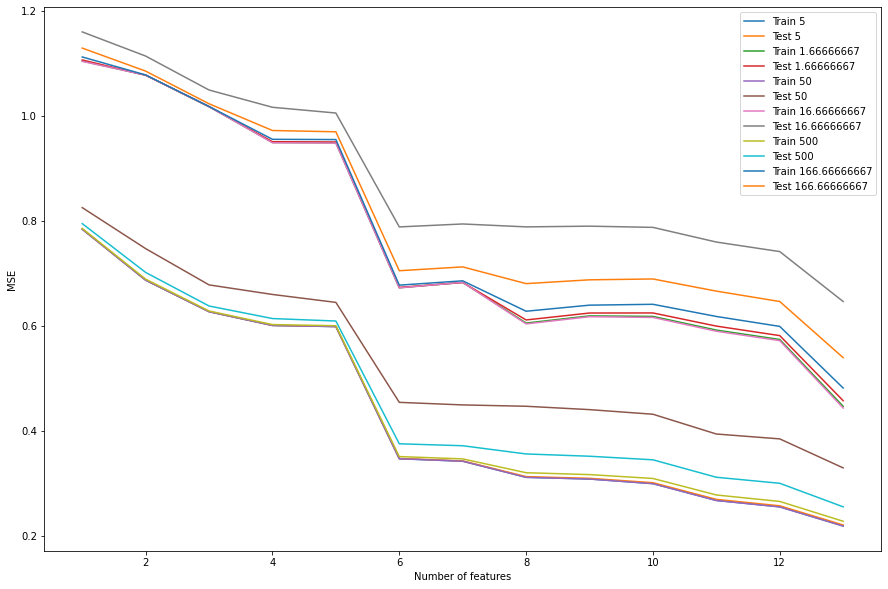

In [277]:
lambd = [5,1.66666667,50,16.66666667,500,166.66666667]
plt.figure(figsize = (15,10))
for feat in range(6):
    sns.lineplot(np.linspace(1,13,13),res.iloc[:,feat],label = "Train "+str(lambd[feat]))
    sns.lineplot(np.linspace(1,13,13),res.iloc[:,feat+6],label = "Test "+str(lambd[feat]))
    plt.xlabel("Number of features")
    plt.ylabel("MSE")
plt.show()

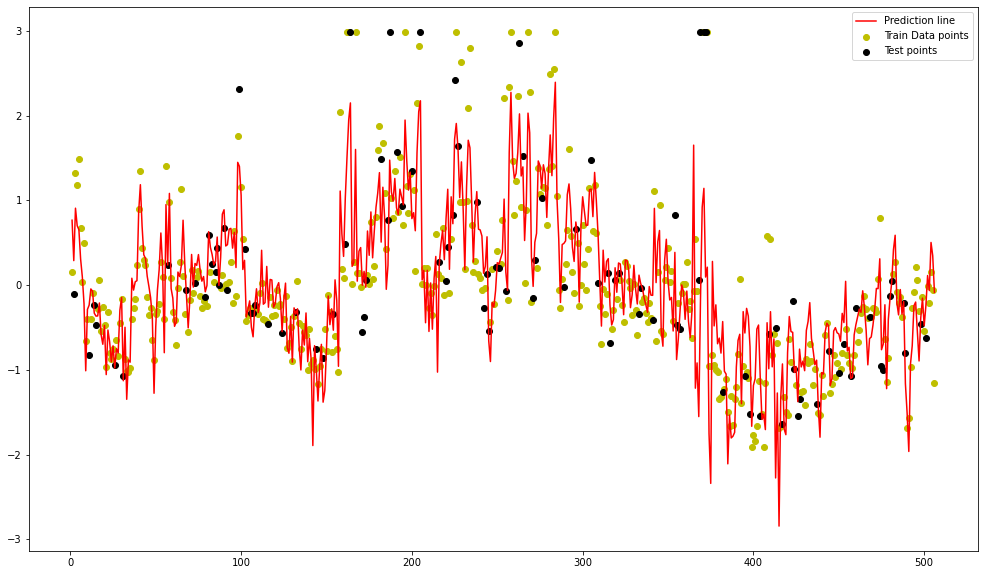

In [290]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(111)
ax.set_ylabel("Housing prices")
ax.set_xlabel("Points")
plt.title("Housing Regression")
test = list()
train = list()
for feat in range(2,15):
    temp1 = list()
    temp2 = list()
    for alp in [0.001,0.003,0.0001,0.0003,0.00001,0.00003]:
        try:
            model = Lasso(alpha = alp,fit_intercept = False,normalize = False,copy_X = True).fit(X_train.iloc[:,1:feat],Y_train.iloc[:,1:])
            temp1.append(mean_squared_error(model.predict(X_train.iloc[:,1:feat]),Y_train.iloc[:,1:]))
            temp2.append(mean_squared_error(model.predict(X_test.iloc[:,1:feat]),Y_test.iloc[:,1:]))
            plt.cla()
            ax.scatter(X_train["id"],Y_train.iloc[:,1:],c = "y",label = "Train Data points")
            ax.scatter(X_test["id"],Y_test.iloc[:,1:],c = "k",label = "Test points")
            ax.plot(np.linspace(1,506,506),np.dot(data_norm.iloc[:,1:feat],model.coef_.T),c = "r",label = "Prediction line")
            ax.legend()
            #plt.show()
            display.display(plt.gcf())
            display.clear_output(wait=True)
            #display.display(plt.gcf())  
            time.sleep(0.01)
        except KeyboardInterrupt:
            break
    train.append(temp1)
    test.append(temp2)
    

In [291]:
mylist = list()
for i in range(len(train)):
    temp = list()
    for j in range(6):
        temp.append(train[i][j])
        temp.append(test[i][j])
    mylist.append(temp)
res = pd.DataFrame(mylist)   
res
        

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.783707,1.103361,0.783714,1.103767,0.783707,1.103179,0.783707,1.103220,0.783707,1.103161,0.783707,1.103165
1,0.686549,1.077233,0.686561,1.077191,0.686547,1.077255,0.686547,1.077250,0.686547,1.077257,0.686547,1.077257
2,0.626494,1.017229,0.626507,1.017063,0.626492,1.017307,0.626492,1.017289,0.626492,1.017314,0.626492,1.017313
3,0.600255,0.948399,0.600275,0.948880,0.600252,0.948188,0.600252,0.948234,0.600252,0.948167,0.600252,0.948171
4,0.598134,0.947744,0.598155,0.948201,0.598131,0.947545,0.598131,0.947589,0.598131,0.947525,0.598131,0.947530
5,0.346300,0.671944,0.346323,0.671981,0.346297,0.671934,0.346297,0.671935,0.346297,0.671933,0.346297,0.671933
6,0.341616,0.682427,0.341639,0.682349,0.341613,0.682469,0.341613,0.682460,0.341613,0.682474,0.341613,0.682473
7,0.310855,0.603452,0.310994,0.605711,0.310838,0.602486,0.310839,0.602692,0.310838,0.602389,0.310838,0.602410
8,0.307631,0.617222,0.307770,0.619526,0.307614,0.616246,0.307615,0.616463,0.307614,0.616147,0.307614,0.616169
9,0.298802,0.616499,0.299145,0.620557,0.298759,0.614760,0.298763,0.615142,0.298759,0.614589,0.298759,0.614627


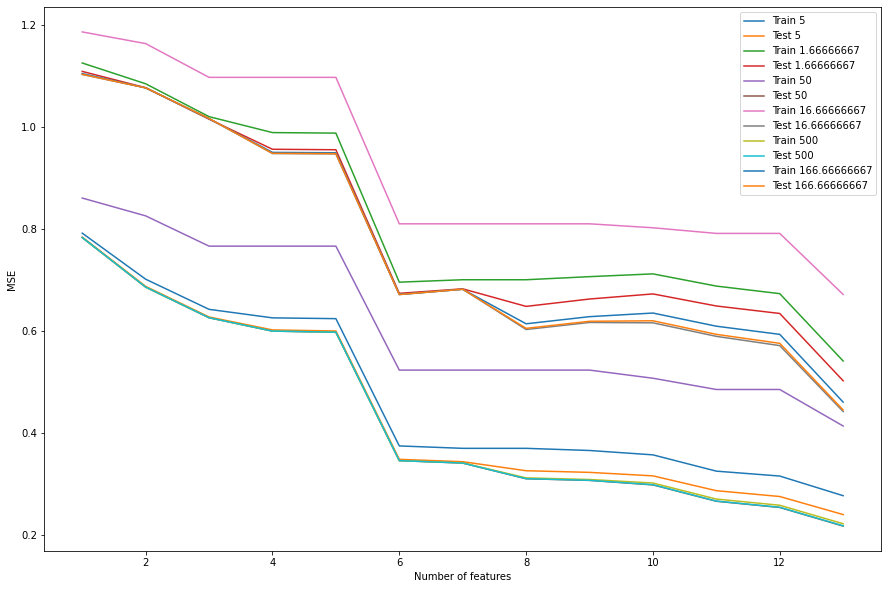

In [287]:
lambd = [5,1.66666667,50,16.66666667,500,166.66666667]
plt.figure(figsize = (15,10))
for feat in range(6):
    sns.lineplot(np.linspace(1,13,13),res.iloc[:,feat],label = "Train "+str(lambd[feat]))
    sns.lineplot(np.linspace(1,13,13),res.iloc[:,feat+6],label = "Test "+str(lambd[feat]))
    plt.xlabel("Number of features")
    plt.ylabel("MSE")
plt.show()